In [3]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
from fa2 import ForceAtlas2

In [4]:
df_edges = pd.read_csv("data/graph.csv", sep=';')
display(df_edges)


,source,target,weight
0,0,1,2
1,0,2,1
2,0,3,5
3,0,4,3
4,0,12,1
...,...,...,...
2980,1003,2013,1
2981,1006,1322,1
2982,1006,2013,1
2983,1322,2013,1


In [5]:
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)
display(G)

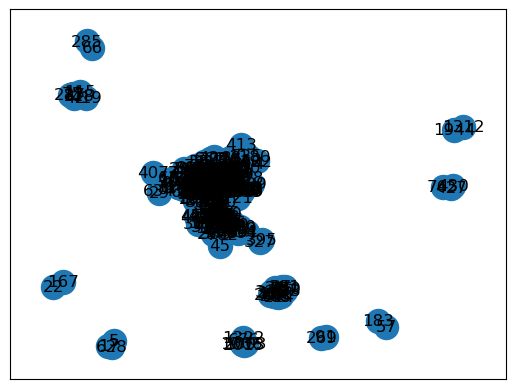

In [6]:
nx.draw_networkx(G)

In [7]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=1e-1, threshold=1e-100,seed=1)


In [8]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 83 members
Community number 1 has 3 members
Community number 2 has 243 members
Community number 3 has 2 members
Community number 4 has 15 members
Community number 5 has 6 members
Community number 6 has 2 members
Community number 7 has 2 members
Community number 8 has 2 members
Community number 9 has 3 members
Community number 10 has 5 members
Community number 11 has 2 members


In [9]:
display(df_edges)

,source,target,weight
0,0,1,2
1,0,2,1
2,0,3,5
3,0,4,3
4,0,12,1
...,...,...,...
2980,1003,2013,1
2981,1006,1322,1
2982,1006,2013,1
2983,1322,2013,1


In [10]:
print(louvain_partitions[2])

filtered_channels = pd.DataFrame(louvain_partitions[2])

{2049, 1027, 517, 6, 7, 8, 9, 10, 519, 11, 2061, 1039, 16, 15, 530, 529, 21, 534, 23, 539, 29, 31, 32, 546, 37, 2086, 554, 53, 1077, 56, 1084, 61, 62, 64, 576, 1602, 67, 582, 583, 1611, 76, 2124, 78, 1107, 1110, 87, 88, 90, 92, 93, 96, 97, 611, 612, 617, 1133, 109, 1134, 622, 626, 627, 1141, 629, 120, 633, 1146, 122, 121, 125, 634, 639, 645, 137, 651, 1163, 141, 142, 140, 1680, 145, 144, 147, 148, 661, 1165, 152, 1177, 153, 155, 1180, 672, 1185, 165, 1190, 169, 2218, 173, 176, 691, 692, 179, 1203, 1205, 187, 701, 191, 192, 195, 1220, 709, 199, 200, 201, 202, 203, 714, 717, 2255, 207, 208, 209, 723, 211, 722, 212, 215, 725, 221, 1249, 741, 229, 744, 238, 240, 754, 1778, 257, 770, 259, 264, 265, 266, 267, 1800, 1806, 273, 276, 1813, 278, 280, 794, 803, 293, 1833, 813, 307, 308, 309, 310, 824, 313, 1337, 315, 314, 318, 1349, 328, 331, 333, 1360, 339, 852, 341, 342, 855, 340, 859, 1377, 1379, 867, 360, 365, 1390, 366, 878, 1392, 370, 374, 376, 889, 378, 1920, 1408, 1413, 391, 904, 903, 394

In [11]:
display(filtered_channels)

,0
0,2049
1,1027
2,517
3,6
4,7
...,...
238,499
239,1524
240,502
241,508


In [12]:
filtered_channels = filtered_channels[0].sort_values(ascending=True)


In [13]:
display(filtered_channels)

3         6
4         7
5         8
6         9
7        10
       ... 
10     2061
25     2086
41     2124
95     2218
117    2255
Name: 0, Length: 243, dtype: int64

In [14]:
filtered_channels.to_csv("data/louvain_filtered_channels.csv", sep=';', index=False)

In [15]:
def filter_function(n):
    return n in louvain_partitions[2]

In [16]:
sub_G = nx.subgraph_view(G, filter_node=filter_function)

In [17]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=0.9,threshold=1e-7, seed=1)
display(len(louvain_communities))

7

In [18]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 52 members
Community number 1 has 43 members
Community number 2 has 42 members
Community number 3 has 4 members
Community number 4 has 31 members
Community number 5 has 52 members
Community number 6 has 19 members


In [19]:
display(louvain_communities[0])
# Philip de Franco, Drama Alert, IntMensOrg -->Pas très sérieux Plutôt de droite mais doit y avoir des erreurs

{11,
 15,
 53,
 88,
 90,
 97,
 121,
 152,
 155,
 176,
 201,
 240,
 265,
 276,
 315,
 318,
 339,
 342,
 365,
 405,
 413,
 433,
 443,
 460,
 502,
 519,
 530,
 576,
 611,
 612,
 622,
 672,
 717,
 725,
 754,
 794,
 852,
 855,
 867,
 889,
 903,
 909,
 1077,
 1107,
 1165,
 1180,
 1220,
 1377,
 1431,
 1470,
 1515,
 2014}

In [20]:
display(louvain_communities[1])
# CNN, Vox, MSNBC, The Young Turks --> Sérieux Très à gauche

{6,
 8,
 23,
 61,
 64,
 67,
 76,
 78,
 109,
 137,
 141,
 145,
 173,
 191,
 202,
 211,
 257,
 293,
 308,
 328,
 376,
 403,
 429,
 446,
 484,
 499,
 508,
 517,
 554,
 583,
 701,
 722,
 770,
 813,
 824,
 859,
 970,
 972,
 1084,
 1141,
 1163,
 1611,
 1680}

In [21]:
display(louvain_communities[2])
# Inside Edition, Fox News, Daily Wire, Rebel News(Très à droite mais canadien) --> Très à droite 

{9,
 31,
 87,
 125,
 140,
 144,
 215,
 229,
 264,
 267,
 307,
 310,
 331,
 341,
 370,
 394,
 423,
 424,
 428,
 473,
 494,
 582,
 629,
 633,
 645,
 661,
 709,
 714,
 741,
 878,
 904,
 928,
 959,
 1249,
 1349,
 1447,
 1477,
 1800,
 1977,
 2061,
 2086,
 2255}

In [22]:
display(louvain_communities[3])
# Pat Condell (Conspiration ?), Sky News Australia, National Post  --> Canadien, Australien, British, Conspirationist

{407, 617, 1337, 1524}

In [23]:
display(louvain_communities[4])
# Today, China uncensored, Fox Business, The dedicated Citizen --> compliqué à classer (business et Chine ?)

{96,
 153,
 169,
 187,
 195,
 199,
 203,
 208,
 212,
 273,
 278,
 333,
 340,
 360,
 378,
 463,
 534,
 539,
 639,
 723,
 1001,
 1039,
 1110,
 1203,
 1379,
 1533,
 1813,
 1833,
 1920,
 2124,
 2218}

In [24]:
display(louvain_communities[5])
# Truly, ABC News, BBC News, True Crime Daily, Business Insider, NYT --> Sérieux Gauche / Leaning left / centre


{7,
 10,
 16,
 21,
 32,
 37,
 56,
 62,
 92,
 93,
 120,
 122,
 148,
 165,
 192,
 209,
 221,
 259,
 266,
 280,
 313,
 314,
 366,
 374,
 391,
 466,
 468,
 486,
 492,
 498,
 626,
 627,
 691,
 692,
 744,
 803,
 911,
 945,
 974,
 1005,
 1133,
 1134,
 1146,
 1177,
 1185,
 1190,
 1360,
 1390,
 1413,
 1602,
 1806,
 2049}

In [25]:
display(louvain_communities[6])
# Al Jazeera(lean left), African Diaspora news channel, France 24 English, Visual Politik EN

{29,
 142,
 147,
 179,
 200,
 207,
 238,
 309,
 396,
 402,
 529,
 546,
 634,
 651,
 1027,
 1205,
 1392,
 1408,
 1778}

In [26]:
df_tosave = nx.to_pandas_edgelist(sub_G,)
df_tosave.to_csv('data/louvain_filtered_graph.csv', sep=';', index=False)